In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 104)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyoff
#pd.set_option('display.max_rows', 27193)
%matplotlib inline

In [37]:
#load the dataset
districts = pd.read_csv('data/districts.csv').set_index("system_name")

In [38]:
districts.head()

,system,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region
system_name,,,,,,,,,,,,,,,,,,,,,,,,,,
State of Tennessee,0,70.0,54.3,65.3,44.2,48.4,71.8,64.8,41.7,54.7,64.5,943699.0,24.1,8.5,0.3,4.6,14.0,57.9,9374.9,19.4,13.2,6.2,0.2,87.2,8.4,NaN
Anderson County,10,76.1,63.3,73.6,41.0,45.7,73.7,59.2,38.2,54.0,64.5,6304.0,2.8,1.1,0.5,0.2,18.0,58.5,9535.7,19.9,11.5,5.0,0.1,94.0,4.2,East TN
Clinton City,11,NaN,NaN,NaN,NaN,58.3,NaN,NaN,NaN,68.9,69.6,894.0,5.7,2.8,0.3,1.0,18.1,63.4,9537.5,NaN,8.8,1.2,0.0,NaN,NaN,East TN
Oak Ridge City,12,76.9,72.0,83.5,80.9,56.1,86.7,74.6,53.8,55.3,70.8,4326.0,16.6,8.0,0.7,3.0,14.3,52.5,12355.5,23.1,17.5,5.7,0.0,89.7,4.4,East TN
Bedford County,20,64.3,42.4,62.1,32.5,44.1,72.3,63.1,44.6,53.1,61.8,8270.0,11.2,20.6,0.5,9.4,10.9,69.9,7756.2,18.4,8.6,2.2,0.0,90.8,5.4,South Central


In [39]:
# Filter to find the number of districts with a 100% Algebra I proficiency rate.
algebra_100 = districts.loc[districts['alg_1'] == 100]


In [40]:
algebra_100

,system,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region
system_name,,,,,,,,,,,,,,,,,,,,,,,,,,
Paris SSD,401,100.0,NaN,NaN,NaN,52.3,NaN,NaN,NaN,60.6,76.6,1655.0,25.9,2.0,0.0,0.7,17.7,63.6,8840.9,NaN,6.9,2.4,0.0,NaN,NaN,Northwest
Athens City,541,100.0,NaN,NaN,NaN,52.9,NaN,NaN,NaN,59.4,62.5,1504.0,16.5,8.0,0.4,0.1,13.8,73.7,10444.7,NaN,6.8,1.9,0.0,NaN,NaN,Southeast
Franklin SSD,941,100.0,NaN,NaN,NaN,69.1,NaN,NaN,NaN,73.2,83.3,3515.0,15.5,24.0,0.7,12.2,12.5,38.9,13386.3,NaN,3.2,0.3,0.0,NaN,NaN,Mid Cumberland
Lebanon SSD,951,100.0,NaN,NaN,NaN,49.8,NaN,NaN,NaN,52.6,71.3,3572.0,18.4,13.0,0.4,9.2,14.0,61.9,8444.1,NaN,8.4,4.9,0.0,NaN,NaN,Mid Cumberland


In [41]:
districts.describe()

,system,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout
count,146.000000,125.000000,121.000000,129.000000,124.000000,143.000000,128.000000,128.000000,128.000000,142.000000,144.000000,142.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,142.000000,126.000000,145.000000,146.000000,146.000000,129.000000,129.000000
mean,480.486301,70.923200,56.385124,66.472093,45.199194,48.029371,72.425781,64.650000,44.057812,55.484507,65.420833,13291.352113,12.910274,5.655479,0.311644,2.115068,16.719178,59.954795,9059.253521,19.214286,13.130345,2.900685,0.065068,90.043411,5.981395
std,297.071528,14.463592,17.899403,14.420829,15.573422,10.904023,9.351847,11.105386,12.234774,10.957696,12.692385,79742.083248,16.787334,5.126268,0.232382,3.026853,11.922788,16.336121,999.621520,1.580163,6.407248,3.278067,0.132661,9.404502,4.407624
min,0.000000,22.900000,14.700000,11.800000,14.300000,6.700000,36.800000,6.700000,8.200000,23.300000,7.400000,270.000000,0.100000,0.000000,0.000000,0.000000,9.800000,0.000000,7270.000000,14.200000,2.000000,0.000000,0.000000,11.100000,0.000000
25%,212.500000,63.200000,44.300000,59.300000,33.850000,42.700000,67.500000,58.550000,36.375000,48.250000,59.650000,1659.750000,2.725000,2.100000,0.200000,0.125000,13.325000,53.325000,8427.050000,18.400000,8.800000,0.525000,0.000000,87.600000,3.100000
50%,485.000000,73.100000,57.900000,68.900000,44.200000,47.500000,73.150000,66.150000,44.250000,55.300000,66.500000,3456.500000,6.250000,4.050000,0.300000,0.950000,14.800000,61.900000,8862.300000,18.900000,12.300000,2.200000,0.000000,91.500000,5.300000
75%,757.750000,79.500000,68.000000,74.500000,54.775000,53.650000,77.525000,71.400000,51.325000,62.600000,72.500000,6353.500000,16.250000,7.700000,0.400000,2.775000,17.075000,70.175000,9419.450000,19.850000,16.900000,4.275000,0.100000,94.900000,7.900000
max,985.000000,100.000000,92.600000,100.000000,86.100000,83.200000,92.900000,88.700000,72.200000,88.200000,91.100000,943699.000000,96.700000,25.300000,1.200000,16.200000,98.800000,97.900000,13386.300000,24.100000,41.300000,21.400000,0.800000,100.000000,27.600000


In [43]:
algebra_100.system.value_counts().sum()

4

In [44]:
#Create a new column(s) called `math_achievement` with a value of:
# "High"` if a district's Math proficiency is 75% or higher;
# "Medium"` if a district's Math proficiency is between 50% and 75%
# "Low"` if a district's Math proficiency is below 50%.

#Adding a new column named 'math_achievement' 


def conditions(s):
    if (s['math'] > 70):
        return "High"
    if (s['math'] > 50 (s['math'] < 70)):
        return "Medium"
    else:
        return "Low"

In [51]:
districts['math_achievement'] = districts.apply(conditions, axis=1)

TypeError: ("'int' object is not callable", 'occurred at index State of Tennessee')

In [46]:
def f(row):
    if row['math'] > 70:
        val = "High"
    elif (row['math'] >50 & row['math'] <70):
        val = "Medium"
    else:
        val = "Low"
    return val

In [62]:
districts.apply(f, axis=1)

TypeError: ("unsupported operand type(s) for &: 'int' and 'float'", 'occurred at index State of Tennessee')

In [53]:
shelby_county = districts[districts.system.isin([792])]

In [54]:
shelby_county

,system,alg_1,alg_2,bio,chem,ela,eng_1,eng_2,eng_3,math,science,enrollment,black,hispanic,native,el,swd,ed,expenditures,act_composite,chronic_abs,suspended,expelled,grad,dropout,region
system_name,,,,,,,,,,,,,,,,,,,,,,,,,,
Shelby County,792,59.3,37.3,42.8,23.7,33.0,55.4,48.9,24.0,39.8,47.8,108936.0,78.4,11.3,0.1,8.3,12.9,79.8,11221.6,16.9,17.5,18.5,0.8,72.1,17.6,Southwest/Memphis


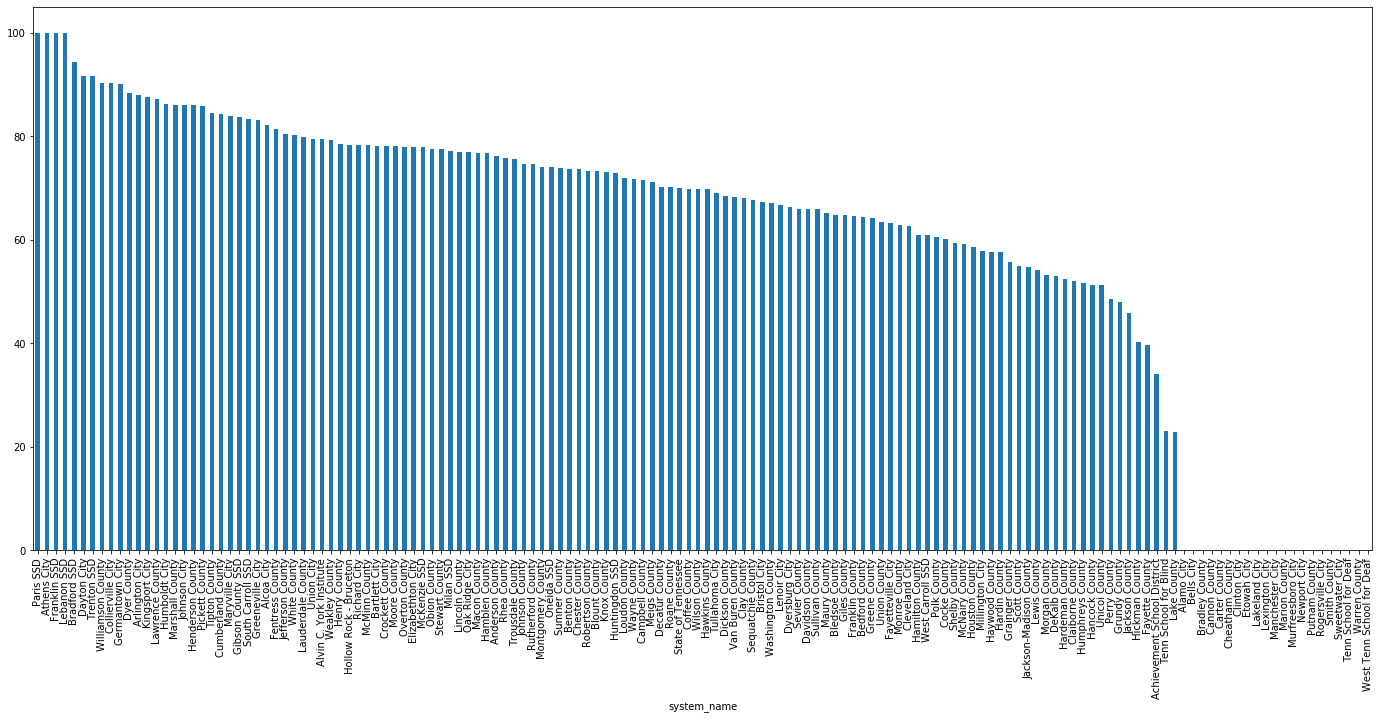

In [61]:
districts.groupby('system_name').alg_1.mean().sort_values(ascending=False).plot(kind='bar',figsize=(24,10))